In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from utils import *

In [2]:
def err_l2_tx(sigma, var='u'):
    data = scipy.io.loadmat(f'./data/fig4a/{var}err{sigma}sigma.mat') 
    rel_err = np.sqrt(np.sum(data['err'], axis=1) / np.sum(data['ex'], axis=1)).mean()
    return rel_err

def err_l2_tx_all(sigma):
    data_u = scipy.io.loadmat(f'./data/fig4a/uerr{sigma}sigma.mat') 
    data_v = scipy.io.loadmat(f'./data/fig4a/verr{sigma}sigma.mat')
    data_w = scipy.io.loadmat(f'./data/fig4a/werr{sigma}sigma.mat')
    rel_err = np.sqrt(np.sum(data_u['err'] + data_v['err'] + data_w['err'], axis=1) / np.sum(data_u['ex'] + data_v['ex'] + data_w['ex'], axis=1)).mean()
    return rel_err

def err_l2_x(sigma, var='u'):
    data = scipy.io.loadmat(f'./data/fig4a/{var}err{sigma}sigma.mat') 
    rel_err_curve = np.sqrt(data['err'] / data['ex']).mean(axis=0)
    return rel_err_curve

def err_l2_x_all(sigma):
    data_u = scipy.io.loadmat(f'./data/fig4a/uerr{sigma}sigma.mat') 
    data_v = scipy.io.loadmat(f'./data/fig4a/verr{sigma}sigma.mat')
    data_w = scipy.io.loadmat(f'./data/fig4a/werr{sigma}sigma.mat')
    rel_err_curve = np.sqrt((data_u['err'] + data_v['err'] + data_w['err']) / (data_u['ex'] + data_v['ex'] + data_w['ex'])).mean(axis=0)
    return rel_err_curve

In [3]:
# Color blind palette
sns.set_palette("colorblind")
palette = sns.color_palette("colorblind")

Text(0.5, 1.0, 'Relative $L_x^2$ Error of $\\mathbf{u}$')

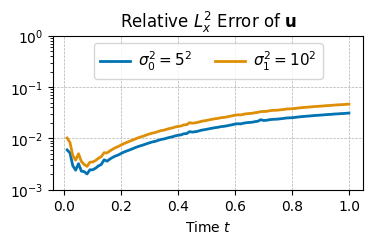

In [4]:
t = np.arange(0.01, 1.01, 0.01)

fig, ax = plt.subplots(figsize=(4, 2))
ax.plot(t, err_l2_x_all(5), linewidth=2, label=r'$\sigma_0^2=5^2$', color=palette[0])
ax.plot(t, err_l2_x_all(10), linewidth=2, label=r'$\sigma_1^2=10^2$', color=palette[1])

ax.set_xlabel(rf'Time $t$')
ax.set_yscale('log')
ax.set_yticks([1e-3, 1e-2, 1e-1, 1])
ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend(loc='upper center', ncol=2, fontsize=11, columnspacing=1.5, handletextpad=0.5)

ax.set_title('Relative $L_x^2$ Error of $\mathbf{u}$')

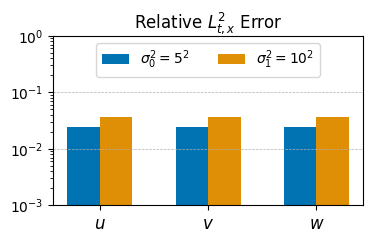

In [5]:
fig, ax = plt.subplots(figsize=(4, 2.2))

x = np.arange(3)
bar_width = 0.3

data1 = [err_l2_tx(5, var) for var in ['u', 'v', 'w']]
data2 = [err_l2_tx(10, var) for var in ['u', 'v', 'w']]

ax.bar(x - 0.5 * bar_width, data1, width=bar_width, label=r'$\sigma_0^2=5^2$', color=palette[0])
ax.bar(x + 0.5 * bar_width, data2, width=bar_width, label=r'$\sigma_1^2=10^2$', color=palette[1])

ax.set_xticks(x)
ax.set_xticklabels([rf'$u$',rf'$v$',rf'$w$'], fontsize=12)
ax.set_yscale('log')
ax.set_yticks([1e-3, 1e-2, 1e-1, 1e0])
ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

ax.set_title('Relative $L_{t,x}^2$ Error')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)